# Exploratory Data Analysis on DC Pothole Data

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [4]:
!pwd

/c/Users/602770/downloads/wids


In [19]:
path = '../Pothole__Last_30_Days.csv'

In [51]:
df = pd.read_csv(path)

In [52]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'SERVICECODE', 'SERVICECODEDESCRIPTION',
       'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
       'ADDDATE', 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICEORDERDATE',
       'INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME',
       'SERVICEORDERSTATUS', 'STATUS_CODE', 'SERVICEREQUESTID', 'PRIORITY',
       'STREETADDRESS', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'CITY',
       'STATE', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'WARD'],
      dtype='object')

In [53]:
df.rename(columns=lambda x: x.lower(), inplace=True)

In [54]:
df.columns

Index(['x', 'y', 'objectid', 'servicecode', 'servicecodedescription',
       'servicetypecodedescription', 'organizationacronym', 'servicecallcount',
       'adddate', 'resolutiondate', 'serviceduedate', 'serviceorderdate',
       'inspectionflag', 'inspectiondate', 'inspectorname',
       'serviceorderstatus', 'status_code', 'servicerequestid', 'priority',
       'streetaddress', 'xcoord', 'ycoord', 'latitude', 'longitude', 'city',
       'state', 'zipcode', 'maraddressrepositoryid', 'ward'],
      dtype='object')

In [60]:
df.isnull().mean()

x                             0.000000
y                             0.000000
objectid                      0.000000
servicecode                   0.000000
servicecodedescription        0.000000
servicetypecodedescription    0.000000
organizationacronym           0.000000
servicecallcount              0.000000
adddate                       0.000000
resolutiondate                0.088161
serviceduedate                0.000000
serviceorderdate              0.000000
inspectionflag                0.166247
inspectiondate                0.166247
inspectorname                 1.000000
serviceorderstatus            0.000000
status_code                   1.000000
servicerequestid              0.000000
priority                      0.000000
streetaddress                 0.000000
xcoord                        0.000000
ycoord                        0.000000
latitude                      0.000000
longitude                     0.000000
city                          0.000000
state                    

In [61]:
df.shape

(397, 29)

In [66]:
df.columns

Index(['x', 'y', 'objectid', 'servicecode', 'servicecodedescription',
       'servicetypecodedescription', 'organizationacronym', 'servicecallcount',
       'adddate', 'resolutiondate', 'serviceduedate', 'serviceorderdate',
       'inspectionflag', 'inspectiondate', 'inspectorname',
       'serviceorderstatus', 'status_code', 'servicerequestid', 'priority',
       'streetaddress', 'xcoord', 'ycoord', 'latitude', 'longitude', 'city',
       'state', 'zipcode', 'maraddressrepositoryid', 'ward'],
      dtype='object')

In [69]:
df['servicecodedescription'].value_counts()

Pothole    397
Name: servicecodedescription, dtype: int64

In [70]:
#dropping unnecessary columns
df = df.loc[:, ['x', 'y',  'streetaddress', 'xcoord', 'ycoord', 'latitude', 'longitude',
           'zipcode', 'maraddressrepositoryid', 'ward']]




In [78]:
pd.DataFrame(df['zipcode'].value_counts())

,zipcode
20016,42
20002,38
20001,31
20032,29
20011,29
20020,28
20003,25
20019,25
20009,21
20008,18


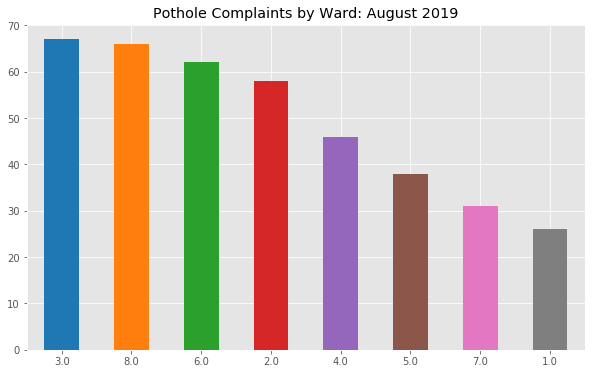

In [125]:
my_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
             "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

df['ward'].value_counts().plot(kind='bar', color=my_colors, figsize=(10,6))
plt.title('Pothole Complaints by Ward: August 2019')
plt.xticks(rotation=0);


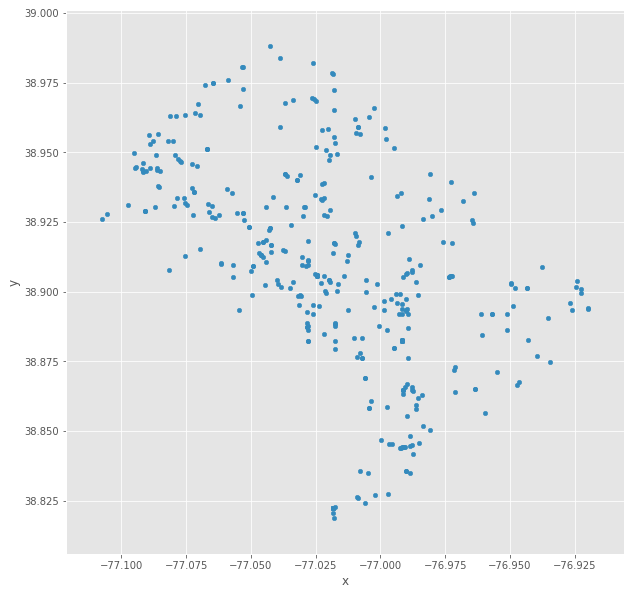

In [139]:
df.plot(x='x', y='y', kind='scatter', figsize=(10,10));

In [140]:
df.head()

,x,y,streetaddress,xcoord,ycoord,latitude,longitude,zipcode,maraddressrepositoryid,ward
0,-77.018106,38.822447,4555 OVERLOOK AVENUE SW,398427.910000,128295.650000,38.822440,-77.018104,20375,291850,8.0
1,-77.057234,38.935178,2738 ORDWAY STREET NW,395037.950000,140811.020000,38.935170,-77.057232,20008,223253,3.0
2,-76.946425,38.867561,1600 FORT DAVIS PLACE SE,404649.600000,133304.770000,38.867553,-76.946423,20020,60539,7.0
3,-77.045492,38.917941,20TH STREET NW AND COLUMBIA ROAD NW,396055.031258,138897.052649,38.917934,-77.045490,20009,900109,1.0
4,-77.075338,38.963316,3815 LIVINGSTON STREET NW,393470.880000,143935.700000,38.963308,-77.075336,20015,284799,3.0


In [144]:
# Only has literally the last 30 days - any way we could historical data information? 
# We could even use it to predict where new potholes will appear